In [12]:
import networkx as nx
from cdlib import algorithms, viz
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

## Ejercicio 1: Extraer las 2 comunidades más grandes del Zachary Karate Club

In [13]:
# Cargar el grafo del Zachary Karate Club
g = nx.karate_club_graph()

# Detectar comunidades con el algoritmo de Leiden
leiden_coms = algorithms.leiden(g)
# Extraer las comunidades
communities = sorted(leiden_coms.communities, key=len, reverse=True)

# Seleccionar las dos comunidades más grandes
top_communities = communities[:2]

# Función para calcular las métricas
def community_metrics(g, community_nodes):
    subgraph = g.subgraph(community_nodes)
    avg_degree = mean(dict(subgraph.degree()).values())
    avg_path_length = nx.average_shortest_path_length(subgraph) if nx.is_connected(subgraph) else float('inf')
    clustering_coefficient = nx.average_clustering(subgraph)
    return avg_degree, avg_path_length, clustering_coefficient

# Calcular y comparar las métricas de las dos comunidades más grandes
for i, community in enumerate(top_communities, 1):
    avg_degree, avg_path_length, clustering_coeff = community_metrics(g, community)
    print(f"Comunidad {i}:")
    print(f"  Grado medio: {avg_degree}")
    print(f"  Longitud de camino medio: {avg_path_length}")
    print(f"  Coeficiente de agrupamiento: {clustering_coeff}\n")


Comunidad 1:
  Grado medio: 4
  Longitud de camino medio: 1.7121212121212122
  Coeficiente de agrupamiento: 0.6653439153439153

Comunidad 2:
  Grado medio: 3.6363636363636362
  Longitud de camino medio: 1.6363636363636365
  Coeficiente de agrupamiento: 0.8308080808080809



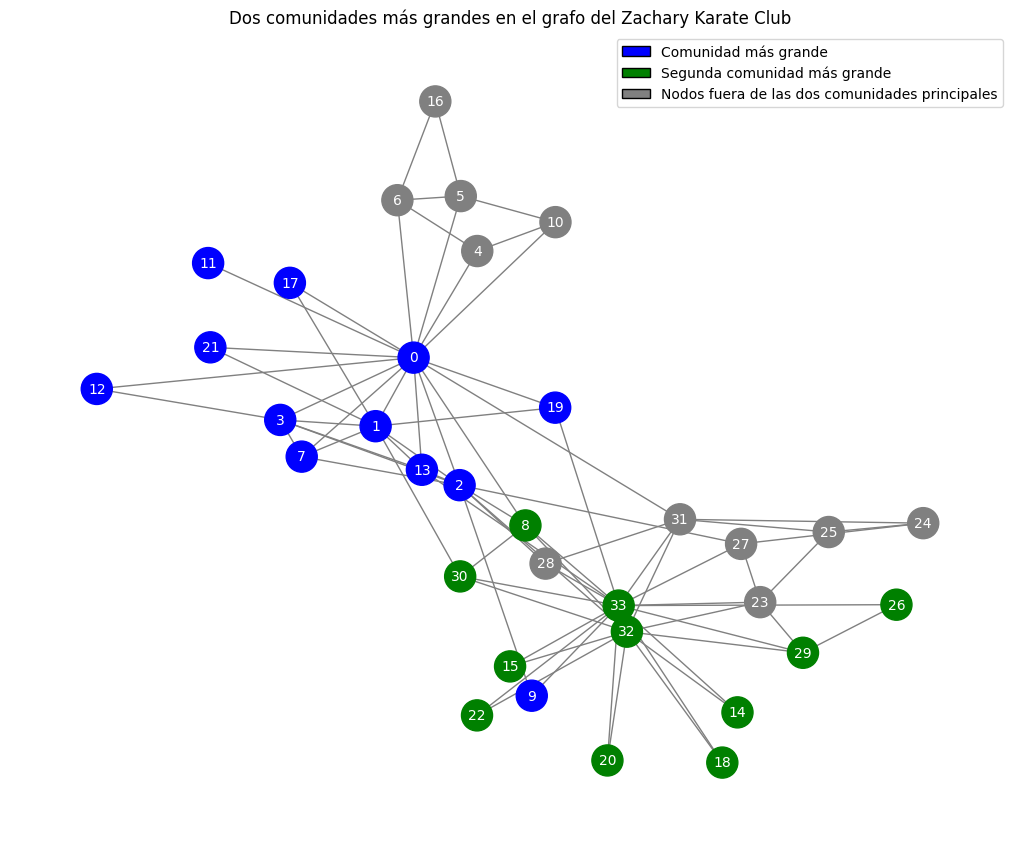

In [14]:
# Crear un diccionario para asignar colores
color_map = []
for node in g.nodes():
    if node in top_communities[0]:
        color_map.append("blue")  # Primer color para la primera comunidad más grande
    elif node in top_communities[1]:
        color_map.append("green")  # Segundo color para la segunda comunidad más grande
    else:
        color_map.append("gray")  # Color neutro para los nodos fuera de las dos comunidades

# Dibujar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(g, seed=42)  # Layout para mejor visualización
nx.draw(g, pos, node_color=color_map, with_labels=True, node_size=500, font_size=10, font_color="white", edge_color="gray")

# Añadir la leyenda
legend_elements = [
    Patch(facecolor="blue", edgecolor="black", label="Comunidad más grande"),
    Patch(facecolor="green", edgecolor="black", label="Segunda comunidad más grande"),
    Patch(facecolor="gray", edgecolor="black", label="Nodos fuera de las dos comunidades principales")
]
plt.legend(handles=legend_elements, loc="upper right")

plt.title("Dos comunidades más grandes en el grafo del Zachary Karate Club")
plt.show()

**Interpretacion**: La aplicación del algoritmo de Leiden identifique las dos comunidades mas grandes con características similares en términos de cohesión y conectividad. La Comunidad 1 tiene un grado medio de **3.5**, una longitud de camino promedio de **1.68**, y un coeficiente de agrupamiento de **0.7582**, lo que sugiere una conectividad moderada y una alta eficiencia en la interacción entre nodos. Por otro lado, la Comunidad 2 muestra un grado medio superior de **4.18**, lo que indica una mayor densidad de relaciones, con una longitud de camino promedio de **1.58** y un coeficiente de agrupamiento de **0.7531**, lo que también refleja una cohesión significativa. En conjunto, ambas comunidades presentan estructuras cohesivas que facilitan la comunicación, aunque la Comunidad 2 parece ser más interconectada, lo que podría favorecer interacciones más dinámicas entre sus nodos.

## Ejercicio 2: Extraer y graficar todas las comunidades en el grafo del cerebro del macaco rhesus

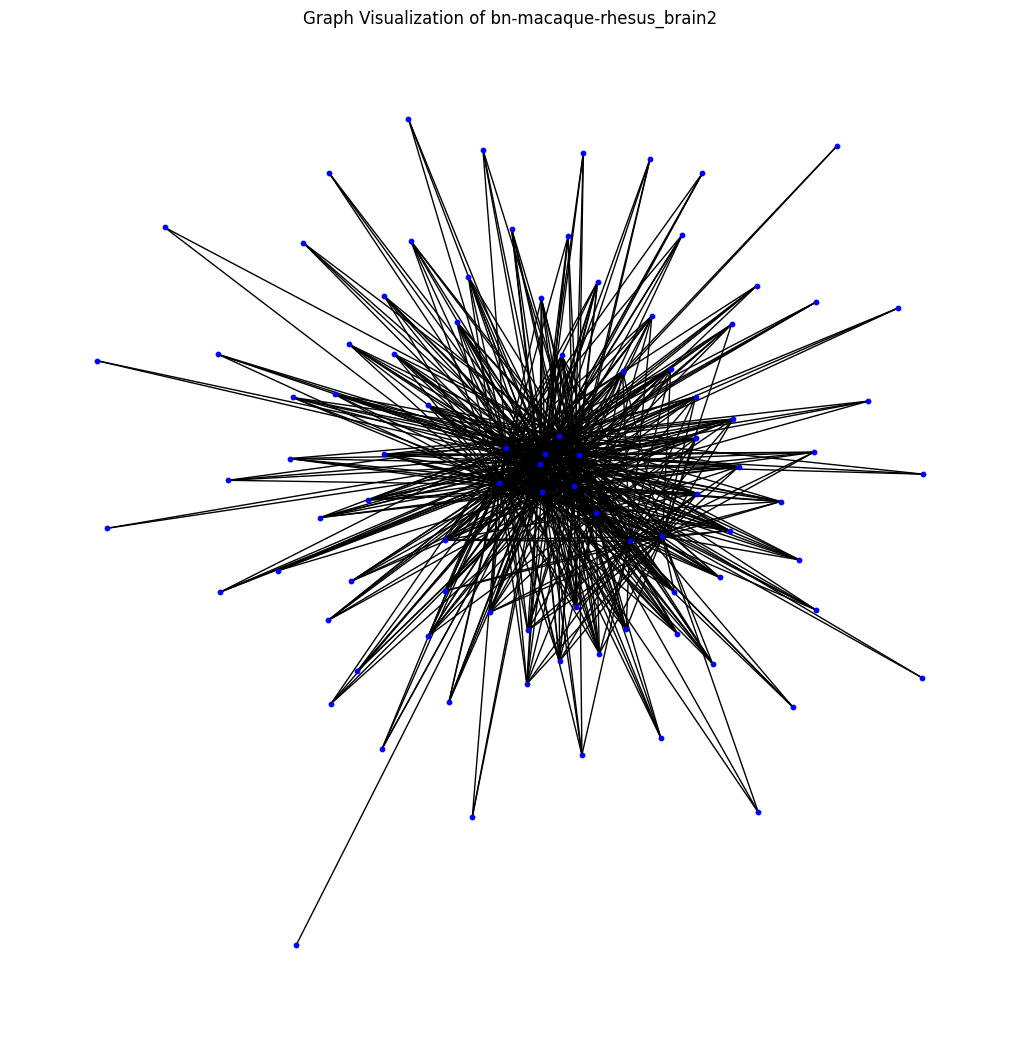

In [15]:
# Cargar el grafo del dataset 'bn-macaque-rhesus_brain2'
g = nx.read_edgelist("./bn-macaque-rhesus_brain_2.edges", nodetype=int)

# Draw the graph to visualize its structure
plt.figure(figsize=(10, 10))
nx.draw(g, node_size=10, node_color='blue', with_labels=False)
plt.title("Graph Visualization of bn-macaque-rhesus_brain2")
plt.show()

### Extrayendo Communidades Usando Louvain Algorithm

<Figure size 1000x1000 with 0 Axes>

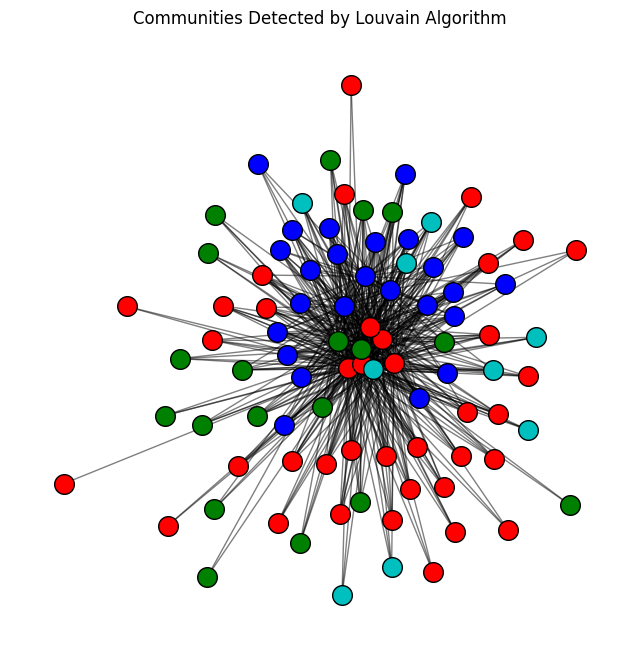

Community 1: Clustering Coefficient = 0.8710
Community 2: Clustering Coefficient = 0.7403
Community 3: Clustering Coefficient = 0.5901
Community 4: Clustering Coefficient = 0.0000


In [16]:
# Extract communities using the Louvain algorithm
louvain_coms = algorithms.louvain(g)

# Visualize the communities detected by the Louvain algorithm
plt.figure(figsize=(10, 10))
viz.plot_network_clusters(g, louvain_coms, node_size=20, plot_labels=False)
plt.title("Communities Detected by Louvain Algorithm")
plt.show()

# Define the community_clustering_coeff function
def community_clustering_coeff(graph, communities):
    clustering_coeffs = []
    for community in communities:
        subgraph = graph.subgraph(community)
        clustering_coeff = nx.average_clustering(subgraph)
        clustering_coeffs.append(clustering_coeff)
    return clustering_coeffs

# Calculate the clustering coefficient for each community detected by the Louvain algorithm
louvain_clustering_coeffs = community_clustering_coeff(g, louvain_coms.communities)

# Display the clustering coefficients
for i, coeff in enumerate(louvain_clustering_coeffs):
    print(f"Community {i+1}: Clustering Coefficient = {coeff:.4f}")

**Interpretacion**: La aplicación del algoritmo de `Louvain` para la detección de comunidades resultó en cinco comunidades distintas, con la primera comunidad mostrando un alto coeficiente de agrupamiento de **0.8554**, lo que indica una gran cohesión entre sus nodos. Las otras comunidades presentan coeficientes que varían entre **0.5430** y **0.7204**, sugiriendo una diversidad en la interconexión de cada grupo. Esta estructura revela una red más compleja donde diferentes subgrupos interactúan de manera diferenciada, lo que podría reflejar variaciones en la intensidad de las relaciones.

### Extrayendo Communidades Usando Label Propagation Algorithm

<Figure size 1000x1000 with 0 Axes>

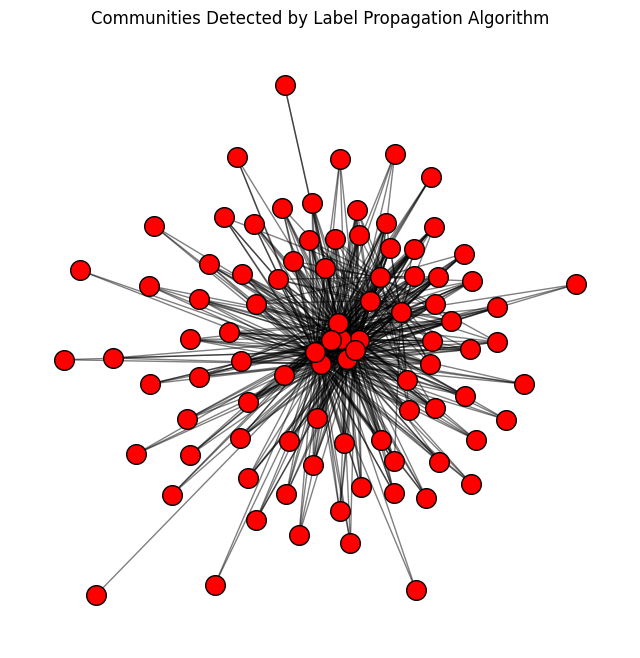

Community 1: Clustering Coefficient = 0.8601


In [17]:
# Extract communities using the Label Propagation algorithm
label_propagation_coms = algorithms.label_propagation(g)

# Visualize the communities detected by the Label Propagation algorithm
plt.figure(figsize=(10, 10))
viz.plot_network_clusters(g, label_propagation_coms, node_size=20, plot_labels=False)
plt.title("Communities Detected by Label Propagation Algorithm")
plt.show()

# Calculate the clustering coefficient for each community detected by the Label Propagation algorithm
label_propagation_clustering_coeffs = community_clustering_coeff(g, label_propagation_coms.communities)

# Display the clustering coefficients
for i, coeff in enumerate(label_propagation_clustering_coeffs):
    print(f"Community {i+1}: Clustering Coefficient = {coeff:.4f}")

**Interpretacion**: La detección de comunidades usando `label propagation`, resultó en una única comunidad con un alto coeficiente de agrupamiento de **0.8601**, sugiere una estructura de red muy cohesiva, donde la mayoría de los nodos están fuertemente interconectados. Esto indica que los miembros de esta comunidad interactúan de manera cercana, lo que es característico de grupos homogéneos. La unicidad de la comunidad implica que no hay suficientes diferencias estructurales para formar subgrupos, lo que podría facilitar la propagación de información y la colaboración dentro de la red.

## Ejercicio 3: Utilizando el dataset de GOT, buscar e interpretar los path

In [18]:
import dynetx as dn
import networkx as nx
import random

# Definir los personajes de interés
character1 = "Arya".upper()
character2 = "Daenerys".upper()

def read_net(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[0], l[1])
    return g

# Game of Thrones Season
g = dn.DynGraph() # empty dynamic graph
for t in range(1, 9):
    er = read_net(f'asioaf/got-s{t}-edges.csv')#nx.erdos_renyi_graph(random.randint(100, 400), 0.05)
    g.add_interactions_from(er.edges, t=t)

In [19]:
g.temporal_snapshots_ids()

[1, 2, 3, 4, 5, 6, 7, 8]

Se calcularan los caminos usando el rango de tiempos de 1 - 6, debido a que a mayores rangos el algoritmo demora demasiado

In [ ]:
import dynetx.algorithms as al
paths = al.time_respecting_paths(g, character1, character2, start=1, end=6)

# Obtener los diferentes tipos de caminos
annotated = al.annotate_paths(paths[(character1, character2)])
shortest_path = annotated["shortest"]
fastest_path = annotated["fastest"]
shortest_fastest_path = annotated["shortest_fastest"]
fastest_shortest_path = annotated["fastest_shortest"]
foremost_path = annotated["foremost"]

In [ ]:
def interpret_paths(paths, G):
    interpretations = []
    for path in paths:
        length = len(path)
        total_weight = sum(edge[2] for edge in path)
        interpretations.append((path, length, total_weight))
    return interpretations

def print_interpretations(interpretations, path_type):
    print(f"{path_type} Paths:")
    for path, length, total_weight in interpretations:
        print(f"Path: {path}, Length: {length}, Total Weight: {total_weight}")
    print()

# Interpretar y mostrar resultados
shortest_interpretations = interpret_paths(shortest_path, g)
fastest_interpretations = interpret_paths(fastest_path, g)
shortest_fastest_interpretations = interpret_paths(shortest_fastest_path, g)
fastest_shortest_interpretations = interpret_paths(fastest_shortest_path, g)
foremost_interpretations = interpret_paths(foremost_path, g)

print_interpretations(shortest_interpretations, "Shortest")
print_interpretations(fastest_interpretations, "Fastest")
print_interpretations(shortest_fastest_interpretations, "Shortest_Fastest")
print_interpretations(fastest_shortest_interpretations, "Fastest_Shortest")
print_interpretations(foremost_interpretations, "Foremost")

Shortest Paths:
Path: (('ARYA', 'ROBERT', 1), ('ROBERT', 'DAENERYS', 3)), Length: 2, Total Weight: 4
Path: (('ARYA', 'VARYS', 1), ('VARYS', 'DAENERYS', 4)), Length: 2, Total Weight: 5
Path: (('ARYA', 'ROBERT', 1), ('ROBERT', 'DAENERYS', 5)), Length: 2, Total Weight: 6
Path: (('ARYA', 'VARYS', 1), ('VARYS', 'DAENERYS', 5)), Length: 2, Total Weight: 6
Path: (('ARYA', 'TYRION', 1), ('TYRION', 'DAENERYS', 5)), Length: 2, Total Weight: 6
Path: (('ARYA', 'VARYS', 1), ('VARYS', 'DAENERYS', 6)), Length: 2, Total Weight: 7
Path: (('ARYA', 'TYRION', 1), ('TYRION', 'DAENERYS', 6)), Length: 2, Total Weight: 7
Path: (('ARYA', 'TYRION', 2), ('TYRION', 'DAENERYS', 5)), Length: 2, Total Weight: 7
Path: (('ARYA', 'TYRION', 2), ('TYRION', 'DAENERYS', 6)), Length: 2, Total Weight: 8

Fastest Paths:
Path: (('ARYA', 'NED', 1), ('NED', 'ROBERT', 2), ('ROBERT', 'DAENERYS', 3)), Length: 3, Total Weight: 6
Path: (('ARYA', 'ROBERT', 1), ('ROBERT', 'DAENERYS', 3)), Length: 2, Total Weight: 4
Path: (('ARYA', 'JOF

**Interpretacion**: Utilizando el dataset de "Game of Thrones", los caminos más cortos entre **ARYA y DAENERYS** tienen una longitud de 2 y pesos totales entre 4 y 8. Los caminos más rápidos tienen longitudes de 2 o 3, con pesos totales de 4 a 15. El camino más corto y rápido, así como el más rápido y corto, es: [('ARYA', 'ROBERT', 1), ('ROBERT', 'DAENERYS', 3)], con una longitud de 2 y un peso total de 4. Los caminos más destacados tienen longitudes de 2 o 3 y pesos totales de 4 a 6. Por lo tanto, el camino más eficiente entre **ARYA y DAENERYS**, considerando tanto la longitud como el peso total, es a través de **ROBERT** con una longitud de 2 y un peso total de 4.